<a href="https://colab.research.google.com/github/ShoOoi/MxDseminar/blob/master/B3seminar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B3 seminar
- 近年流行している深層学習（画像ベース）の技術を使用してみる
- 主にオブジェクト認識、行動認識、画像生成の3種類とする。

## 担当回
1.   YOLO algorithm
2.   Open Pose
3.   How to use Melendy Software
4.   Generative Activate Networks
5.   Yolo algorithm (Training)　時間があれば



## 1.   Yolo algorithm (Training)

### Step.1 Mount my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Step.2 Download darknet programs

In [ ]:
cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
!git clone https://github.com/ShoOoi/darknet_mxd.git

Cloning into 'darknet'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10996 (delta 4), reused 10 (delta 4), pack-reused 10984
Receiving objects: 100% (10996/10996), 10.64 MiB | 6.58 MiB/s, done.
Resolving deltas: 100% (7404/7404), done.
Checking out files: 100% (1978/1978), done.


### Step.3 Run a sample program

In [ ]:
cd darknet_mxd/

/content/drive/My Drive/Colab Notebooks/darknet


In [ ]:
!mkdir build-release

mkdir: cannot create directory ‘build-release’: File exists


In [ ]:
cd build-release

/content/drive/My Drive/Colab Notebooks/darknet/build-release


In [ ]:
!cmake ..

-- Autodetected CUDA architecture(s):  3.7
-- Building with CUDA flags: -gencode;arch=compute_37,code=sm_37
-- Your setup does not supports half precision (it requires CC >= 7.5)
--   ->  darknet is fine for now, but uselib_track has been disabled!
--   ->  Please rebuild OpenCV from sources with CUDA support to enable it
-- CMAKE_CUDA_FLAGS: -gencode arch=compute_37,code=sm_37 --compiler-options " -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -Wno-deprecated-declarations -Wno-write-strings -DGPU -DCUDNN -DOPENCV -fPIC -fopenmp -Ofast " 
-- Configuring done
-- Generating done
-- Build files have been written to: /content/drive/My Drive/Colab Notebooks/darknet/build-release


In [ ]:
!make

[ 47%] Built target darknet
[ 96%] Built target dark
[ 98%] Built target uselib


In [ ]:
!make install

[ 47%] Built target darknet
[ 96%] Built target dark
[ 98%] Built target uselib
Install the project...
-- Install configuration: ""
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet/libdark.so
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet/include/darknet/darknet.h
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet/include/darknet/yolo_v2_class.hpp
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet/uselib
-- Installing: /content/drive/My Drive/Colab Notebooks/darknet/darknet
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet/share/darknet/DarknetTargets.cmake
-- Installing: /content/drive/My Drive/Colab Notebooks/darknet/share/darknet/DarknetTargets-noconfig.cmake
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet/share/darknet/DarknetConfig.cmake
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet/share/darknet/DarknetConfigVersion.cmake


In [ ]:
cd ..

/content/drive/My Drive/Colab Notebooks/darknet


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-10-29 02:33:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  48.4MB/s    in 5.1s    

2019-10-29 02:33:54 (46.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detector test ./cfg/coco.data ./cfg/yolov3.cfg ./yolov3.weights

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

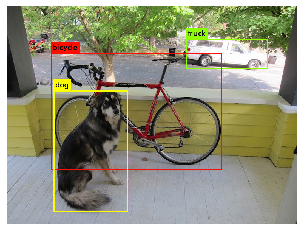

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

### Step.3 Train a weight file （時間があれば）

Generate the learning images using "BBox-Label-Tool.py."

参考：
https://qiita.com/chimamedia/items/c261a858e1c7b8160af1

XXXXXX is folder name.

Step1: python .\BBox-Label-Tool.py XXXXXX

Step2: python .\inflate_images.py XXXXXX

Step3: python .\convert_v3.py XXXXX

Step4: Upload the files.

In [ ]:
!unzip yurucamp.zip

Archive:  yurucamp.zip
 extracting: yurucamp/classes.txt    
  inflating: yurucamp/config/learning.cfg  
  inflating: yurucamp/config/learning.data  
 extracting: yurucamp/config/learning.names  
  inflating: yurucamp/config/train.txt  
  inflating: yurucamp/config/valid.txt  
  inflating: yurucamp/images/001/001.jpg  
  inflating: yurucamp/images/001/002.jpg  
  inflating: yurucamp/images/001/003.jpg  
  inflating: yurucamp/images/001/004.jpg  
  inflating: yurucamp/images/001/005.jpg  
  inflating: yurucamp/images/001/006.jpg  
  inflating: yurucamp/images/001/007.jpg  
  inflating: yurucamp/images/001/008.jpg  
  inflating: yurucamp/images/001/009.jpg  
  inflating: yurucamp/images/001/010.jpg  
  inflating: yurucamp/images/002/007.jpg  
  inflating: yurucamp/images/002/008.jpg  
  inflating: yurucamp/images/002/009.jpg  
  inflating: yurucamp/images/002/010.jpg  
  inflating: yurucamp/images/002/011.jpg  
  inflating: yurucamp/images/002/013.jpg  
  inflating: yurucamp/images/002/0

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2019-10-29 03:21:33--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  50.4MB/s    in 3.2s    

2019-10-29 03:21:36 (48.1 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train ./yurucamp/config/learning.data ./yurucamp/config/learning.cfg ./darknet53.conv.74 -dont_show

learning
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 -> 

In [ ]:
!./darknet detector test ./yurucamp/config/learning.data ./yurucamp/config/learning.cfg ./backup/learning_last.weights -i 0

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

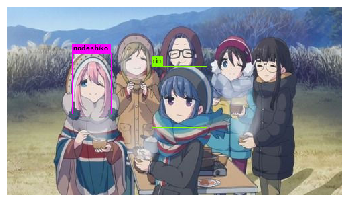

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)